In [1]:
# !pip install pyarrow
# pip install --upgrade pip
# pip install nltk
# pip install tensorflow


In [2]:

# Phase 1: Loading the data


In [3]:
# Loading the data from where it is stored locally

import os
import pandas as pd


import pyarrow.parquet as pq

train_folder = r'C:\Users\jasly\OneDrive\Documents\Masters - Education\Semester 2\CA684 - ML\Assignment\data\2024\train'
test_folder = r'C:\Users\jasly\OneDrive\Documents\Masters - Education\Semester 2\CA684 - ML\Assignment\data\2024\test'

# Reading parquet files from a folder and concatenating them into a dataframe

def read_parquet_folder(folder_path):
    # Getting a list of all parquet files in the folder
    parquet_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.parquet')]
    
    # Reading the files and concatenating them into a single df
    dfs = [pq.read_table(parquet_file).to_pandas() for parquet_file in parquet_files]
    return pd.concat(dfs, ignore_index=True)

train_data = read_parquet_folder(train_folder)
test_data = read_parquet_folder(test_folder)


In [4]:
train_data

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
0,699437355,Children&#39;s circle skirt BLUE GALAXY made o...,The fuxandfriends children&#39;s full circle s...,,physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,2,blue,2,blue,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,426
1,1323699538,"Cow Birthday Tutu for kids, Farm Theme Bday Ou...",💄This listing is for the TUTU ONLY (double rib...,"birthday outfit,girls birthday shirt,Tutu outf...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,11,pink,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,475
2,1142910558,"Zebra print tutu, animal print Skirt, World bo...",All tutus are handmade to order with two layer...,"black and white tutu,striped skirt,zebra tutu,...",physical,,,,,,...,clothing.girls_clothing.skirts,5,clothing,17,white,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,396
3,1320296928,"Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...",Step aside because the princess pop star is he...,"tutu,girls skirt,sparkling tutu,fun skirt,ball...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,12,purple,13,rainbow,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
4,854901795,Bumblebee tutu yellow and black tutu halloween...,"Sparkle, shimmer, twirl and spin,\nThis tutu&#...","dog tutu,fluffy tutu,dance tutu,skirt,flower g...",physical,,,,,birthday,...,clothing.girls_clothing.skirts,5,clothing,18,yellow,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229619,578506261,1969 - Vintage Antiquarian First Edition Willi...,1969 - William Father of Netherlands 1st Editi...,"William the II,Fatherof Netherlands,Spain and ...",physical,,,,,,...,books_movies_and_music.books,4,books_movies_and_music,1,black,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,861
229620,1668964723,Vintage Knickerbocker Hard Plastic Celluloid Y...,Vintage Knickerbocker Hard Plastic Celluloid Y...,"vintage bank,Knickerbocker bank,Knickerbocker ...",physical,,,,,birthday,...,books_movies_and_music.books,4,books_movies_and_music,18,yellow,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,321
229621,1066268899,John Carne Explains Why You Can&#39;t Win: A T...,JOHN CARNE EXPLAINS WHY YOU CAN&#39;T WIN: A T...,"Antique Books,Vintage Books,Rare Books,Old Boo...",physical,,,,,,...,books_movies_and_music.books,4,books_movies_and_music,1,black,9,green,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760
229622,1410156638,In Search of Strange Phenomena by Alan Landsbu...,This is 1977 first UK edition of &quot;In Sear...,"paranormal book,supernatural,occult,time trave...",physical,,,,,,...,books_movies_and_music.books,4,books_movies_and_music,1,black,2,blue,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [5]:
test_data

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,image/encoded,image/width,image/height
0,661373440,"Classroom Valentine Favors, Valentine Pencils,...","Valentine Favors, Robots of Love Vinyl Pencil ...","Valentines day favor,kindergarten treats,valen...",physical,,kids' crafts,,,,valentine's day,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,739
1,1501009290,5 Colour Slatepencils In One Pack Order NOw,5 Colour Slatepencils In One Pack Order NOw\n\...,"slatepencils,clay,nakumatt,edibleclay",physical,,drawing & drafting,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,321
2,1105447030,"No 2 Pencils by Associated Commercial, #2 Wri...","This listing is for a dozen, unused pre sharpe...","Faber Castell,aw faber,Faber-Castell,antique p...",physical,,drawing & drafting,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,330
3,1140081090,"Personalized Carpenter Pencils, Engraved Carpe...",EtchThisOut is now offering Carpenter Pencils ...,"Personalized Pencils,Carpenter Pencils,Carpent...",physical,,drawing & drafting,,,birthday,valentine's day,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
4,793448890,Vintage 1960&#39;s Autopoint mechanical pencil...,Vintage 1950&#39;s Autopoint mechanical pencil...,"Mechanical pencil,Autopoint pencil,Drafting pe...",physical,,calligraphy,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25509,869022010,Dinosaur Rice Krispies Treats 0.78oz Wrapper P...,CUSTOM ITEM\n\nRice Krispies Treats Wrapper 0....,"Jurassic party,Jurassic Birthday,Jurassic invi...",download,,,,,birthday,,,fantasy,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,474
25510,954065860,"Strawberry Printable Candy Bar Wrapper, Snack ...",Customized Printables for all Occassions\n\nMa...,"tutti fruti chip bag,twotti frutti chips,tutti...",download,,,,,birthday,,,fantasia,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,500
25511,1417634130,Boy Birthday Party Thank You Candy Bar Wrapper...,☆ MATCHING ITEMS ☆\n3.5x2.5&quot; rectangle fa...,"thank you hershey,thank you candy bar,thank yo...",download,,,,,birthday,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,428
25512,942614980,Circus Candy bar 1.55oz PRINTABLE Treats Circu...,Customized Printables for all Occassions\n\nCa...,"potatoes wrapper,Circus favor,Printable Chip b...",download,,,,,birthday,,,fantasia,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,500


In [6]:

# Phase 2 : Understanding the data


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25514 entries, 0 to 25513
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     25514 non-null  int64 
 1   title          25514 non-null  object
 2   description    25514 non-null  object
 3   tags           25514 non-null  object
 4   type           25514 non-null  object
 5   room           25514 non-null  object
 6   craft_type     25514 non-null  object
 7   recipient      25514 non-null  object
 8   material       25514 non-null  object
 9   occasion       25514 non-null  object
 10  holiday        25514 non-null  object
 11  art_subject    25514 non-null  object
 12  style          25514 non-null  object
 13  shape          25514 non-null  object
 14  pattern        25514 non-null  object
 15  image/encoded  25514 non-null  object
 16  image/width    25514 non-null  int64 
 17  image/height   25514 non-null  int64 
dtypes: int64(3), object(15)
me

In [8]:
train_data.describe()

,product_id,bottom_category_id,top_category_id,primary_color_id,secondary_color_id,image/width,image/height
count,2.296240e+05,229624.000000,229624.000000,229624.000000,229624.000000,229624.000000,229624.000000
mean,1.179276e+09,3505.658106,6.991643,8.614731,9.505753,566.759690,566.725556
std,3.840381e+08,3751.955565,3.605474,6.421168,6.433769,24.763315,157.274820
min,5.023404e+06,1.000000,0.000000,0.000000,0.000000,79.000000,36.000000
25%,8.878686e+08,969.000000,5.000000,2.000000,2.000000,570.000000,428.000000
50%,1.264325e+09,1793.000000,7.000000,9.000000,10.000000,570.000000,570.000000
75%,1.515061e+09,6336.000000,9.000000,14.000000,16.000000,570.000000,665.000000
max,1.669799e+09,12493.000000,14.000000,19.000000,19.000000,760.000000,3000.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229624 entries, 0 to 229623
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            229624 non-null  int64 
 1   title                 229624 non-null  object
 2   description           229624 non-null  object
 3   tags                  229624 non-null  object
 4   type                  229624 non-null  object
 5   room                  229624 non-null  object
 6   craft_type            229624 non-null  object
 7   recipient             229624 non-null  object
 8   material              229624 non-null  object
 9   occasion              229624 non-null  object
 10  holiday               229624 non-null  object
 11  art_subject           229624 non-null  object
 12  style                 229624 non-null  object
 13  shape                 229624 non-null  object
 14  pattern               229624 non-null  object
 15  bottom_category_i

In [10]:
test_data.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,image/encoded,image/width,image/height
0,661373440,"Classroom Valentine Favors, Valentine Pencils,...","Valentine Favors, Robots of Love Vinyl Pencil ...","Valentines day favor,kindergarten treats,valen...",physical,,kids' crafts,,,,valentine's day,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,739
1,1501009290,5 Colour Slatepencils In One Pack Order NOw,5 Colour Slatepencils In One Pack Order NOw\n\...,"slatepencils,clay,nakumatt,edibleclay",physical,,drawing & drafting,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,321
2,1105447030,"No 2 Pencils by Associated Commercial, #2 Wri...","This listing is for a dozen, unused pre sharpe...","Faber Castell,aw faber,Faber-Castell,antique p...",physical,,drawing & drafting,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,330
3,1140081090,"Personalized Carpenter Pencils, Engraved Carpe...",EtchThisOut is now offering Carpenter Pencils ...,"Personalized Pencils,Carpenter Pencils,Carpent...",physical,,drawing & drafting,,,birthday,valentine's day,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
4,793448890,Vintage 1960&#39;s Autopoint mechanical pencil...,Vintage 1950&#39;s Autopoint mechanical pencil...,"Mechanical pencil,Autopoint pencil,Drafting pe...",physical,,calligraphy,,,,,,,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [11]:
train_data['type'].unique()

array(['physical', 'download', ''], dtype=object)

In [12]:
train_data['top_category_id'].unique()

array([ 5,  8,  3,  2,  6,  4, 14,  0, 11, 13,  9, 12,  7, 10,  1],
      dtype=int64)

In [13]:
train_data['bottom_category_id'].unique()

array([  426,   476, 10812, ...,   406,   956,   324], dtype=int64)

In [14]:
train_data['primary_color_id'].unique()

array([ 2, 11, 17, 12, 18, 14,  1, 13,  0,  9, 10, 19,  7,  4,  3,  5, 16,
        6, 15], dtype=int64)

In [15]:
train_data['secondary_color_id'].unique()

array([ 2,  1, 13,  9, 17,  7, 10, 11, 16, 19, 12, 18, 15,  0, 14,  4,  5,
        3,  6], dtype=int64)

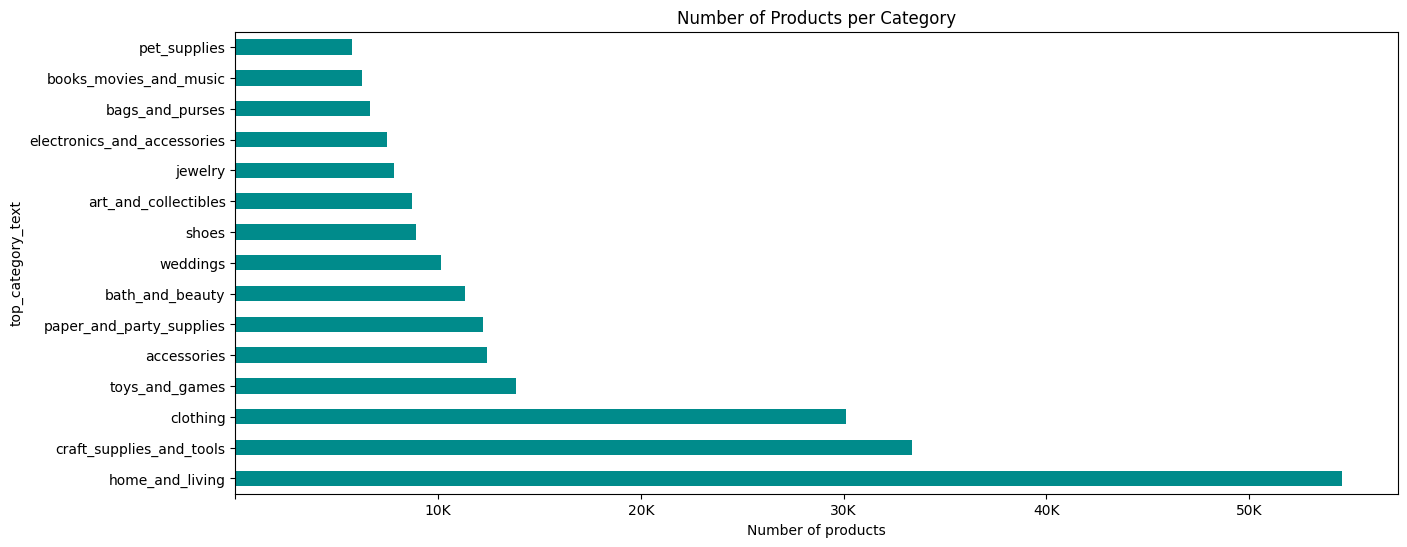

In [16]:
# Visuallising the different products per category

from matplotlib import pyplot as plt
figsize = (15, 6)
column = 'top_category_text'
x_limit = 60000
x_step = 10000
color = 'darkcyan'

figure, ax = plt.subplots(figsize=figsize)
pd.value_counts(
    train_data[column],
    sort=True, ascending=False).plot.barh(color=color)
plt.title(f"Number of Products per Category")
xlabels = [f'{x // 1000:,}K' for x in range(0, x_limit, x_step)]
plt.xticks(range(0, x_limit, x_step), xlabels)
plt.xlabel('Number of products')
plt.setp(ax.get_xticklabels()[0], visible=False)
plt.show()


In [17]:
# Viewing the training data

print("Shape of the dataset:", train_data.shape)
print("First few rows of the dataset:")
print(train_data.head())


Shape of the dataset: (229624, 26)
First few rows of the dataset:
   product_id                                              title   
0   699437355  Children&#39;s circle skirt BLUE GALAXY made o...  \
1  1323699538  Cow Birthday Tutu for kids, Farm Theme Bday Ou...   
2  1142910558  Zebra print tutu, animal print Skirt, World bo...   
3  1320296928  Lilac Tutu Rainbow Dots // Girl&#39;s Tutu, Tu...   
4   854901795  Bumblebee tutu yellow and black tutu halloween...   

                                         description   
0  The fuxandfriends children&#39;s full circle s...  \
1  💄This listing is for the TUTU ONLY (double rib...   
2  All tutus are handmade to order with two layer...   
3  Step aside because the princess pop star is he...   
4  Sparkle, shimmer, twirl and spin,\nThis tutu&#...   

                                                tags      type room   
0                                                     physical       \
1  birthday outfit,girls birthday shirt,Tutu o

In [18]:
# Checking for missing values

missing_values = train_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
product_id              0
title                   0
description             0
tags                    0
type                    0
room                    0
craft_type              0
recipient               0
material                0
occasion                0
holiday                 0
art_subject             0
style                   0
shape                   0
pattern                 0
bottom_category_id      0
bottom_category_text    0
top_category_id         0
top_category_text       0
primary_color_id        0
primary_color_text      0
secondary_color_id      0
secondary_color_text    0
image/encoded           0
image/width             0
image/height            0
dtype: int64


In [19]:
# Looking at the data types of each column

data_types = train_data.dtypes
print("Data types of each column:")
print(data_types)


Data types of each column:
product_id               int64
title                   object
description             object
tags                    object
type                    object
room                    object
craft_type              object
recipient               object
material                object
occasion                object
holiday                 object
art_subject             object
style                   object
shape                   object
pattern                 object
bottom_category_id       int64
bottom_category_text    object
top_category_id          int64
top_category_text       object
primary_color_id         int64
primary_color_text      object
secondary_color_id       int64
secondary_color_text    object
image/encoded           object
image/width              int64
image/height             int64
dtype: object


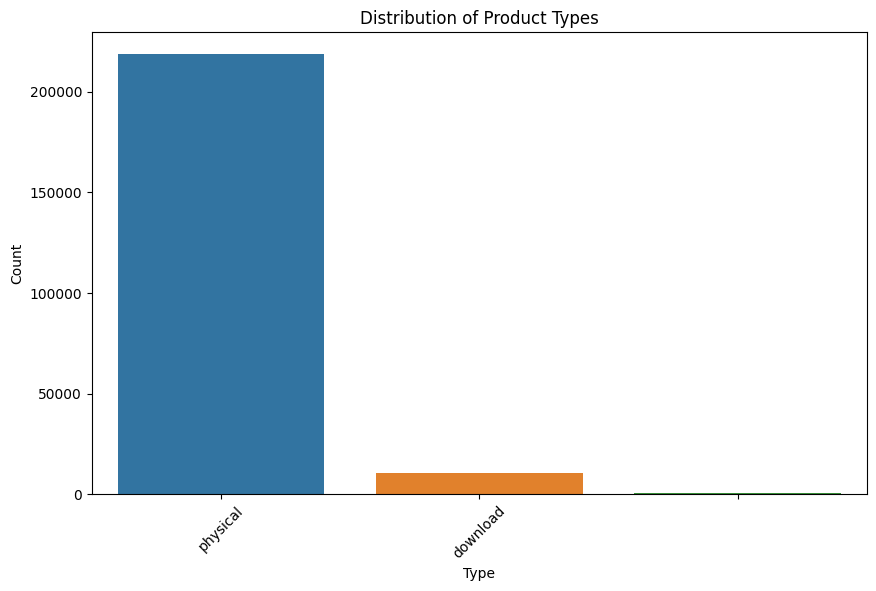

In [20]:
import seaborn as sns
# Visualising the distribution of the variable 'type'

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Product Types')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Performing correlation analysis of numerical columns

numerical_cols = train_data.select_dtypes(include=['int64']).columns
correlation_matrix = train_data[numerical_cols].corr()
print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
                    product_id  bottom_category_id  top_category_id   
product_id            1.000000            0.062016         0.012752  \
bottom_category_id    0.062016            1.000000         0.063345   
top_category_id       0.012752            0.063345         1.000000   
primary_color_id     -0.020697            0.012817         0.028785   
secondary_color_id   -0.015760            0.002422        -0.004492   
image/width           0.032855           -0.010197         0.006169   
image/height          0.091668           -0.001927        -0.030659   

                    primary_color_id  secondary_color_id  image/width   
product_id                 -0.020697           -0.015760     0.032855  \
bottom_category_id          0.012817            0.002422    -0.010197   
top_category_id             0.028785           -0.004492     0.006169   
primary_color_id            1.000000           -0.033390     0.004145   
secondary_color_id         -0.033390          

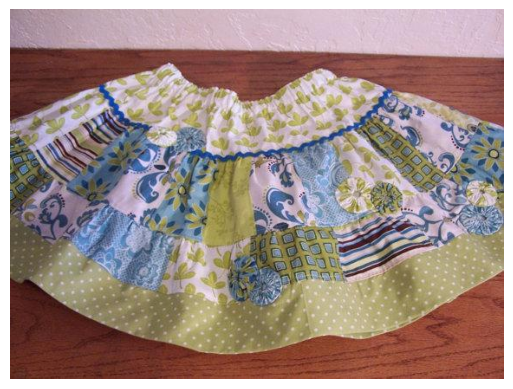

In [22]:
# Displaying individual images

import io
from PIL import Image

sample_image = Image.open(io.BytesIO(train_data['image/encoded'][50]))  # displays the image based on the index specified
plt.imshow(sample_image)
plt.axis('off')
plt.show()


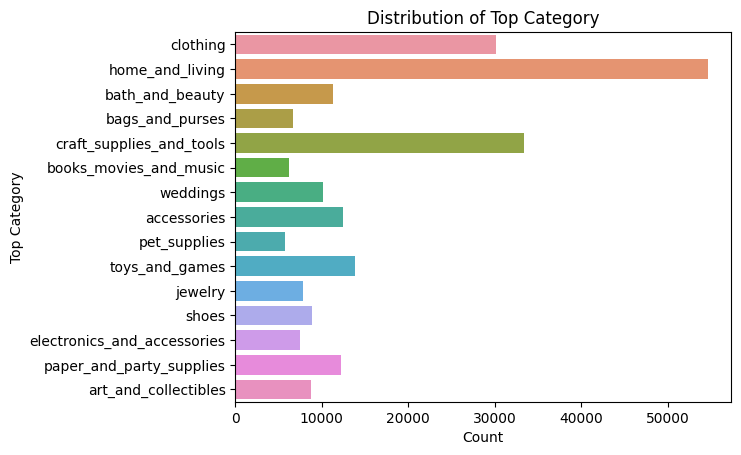

In [23]:
# Visualising the distibution of top_category

sns.countplot(data=train_data, y='top_category_text') 
plt.xlabel('Count') 
plt.ylabel('Top Category') 
plt.title('Distribution of Top Category')
plt.show()


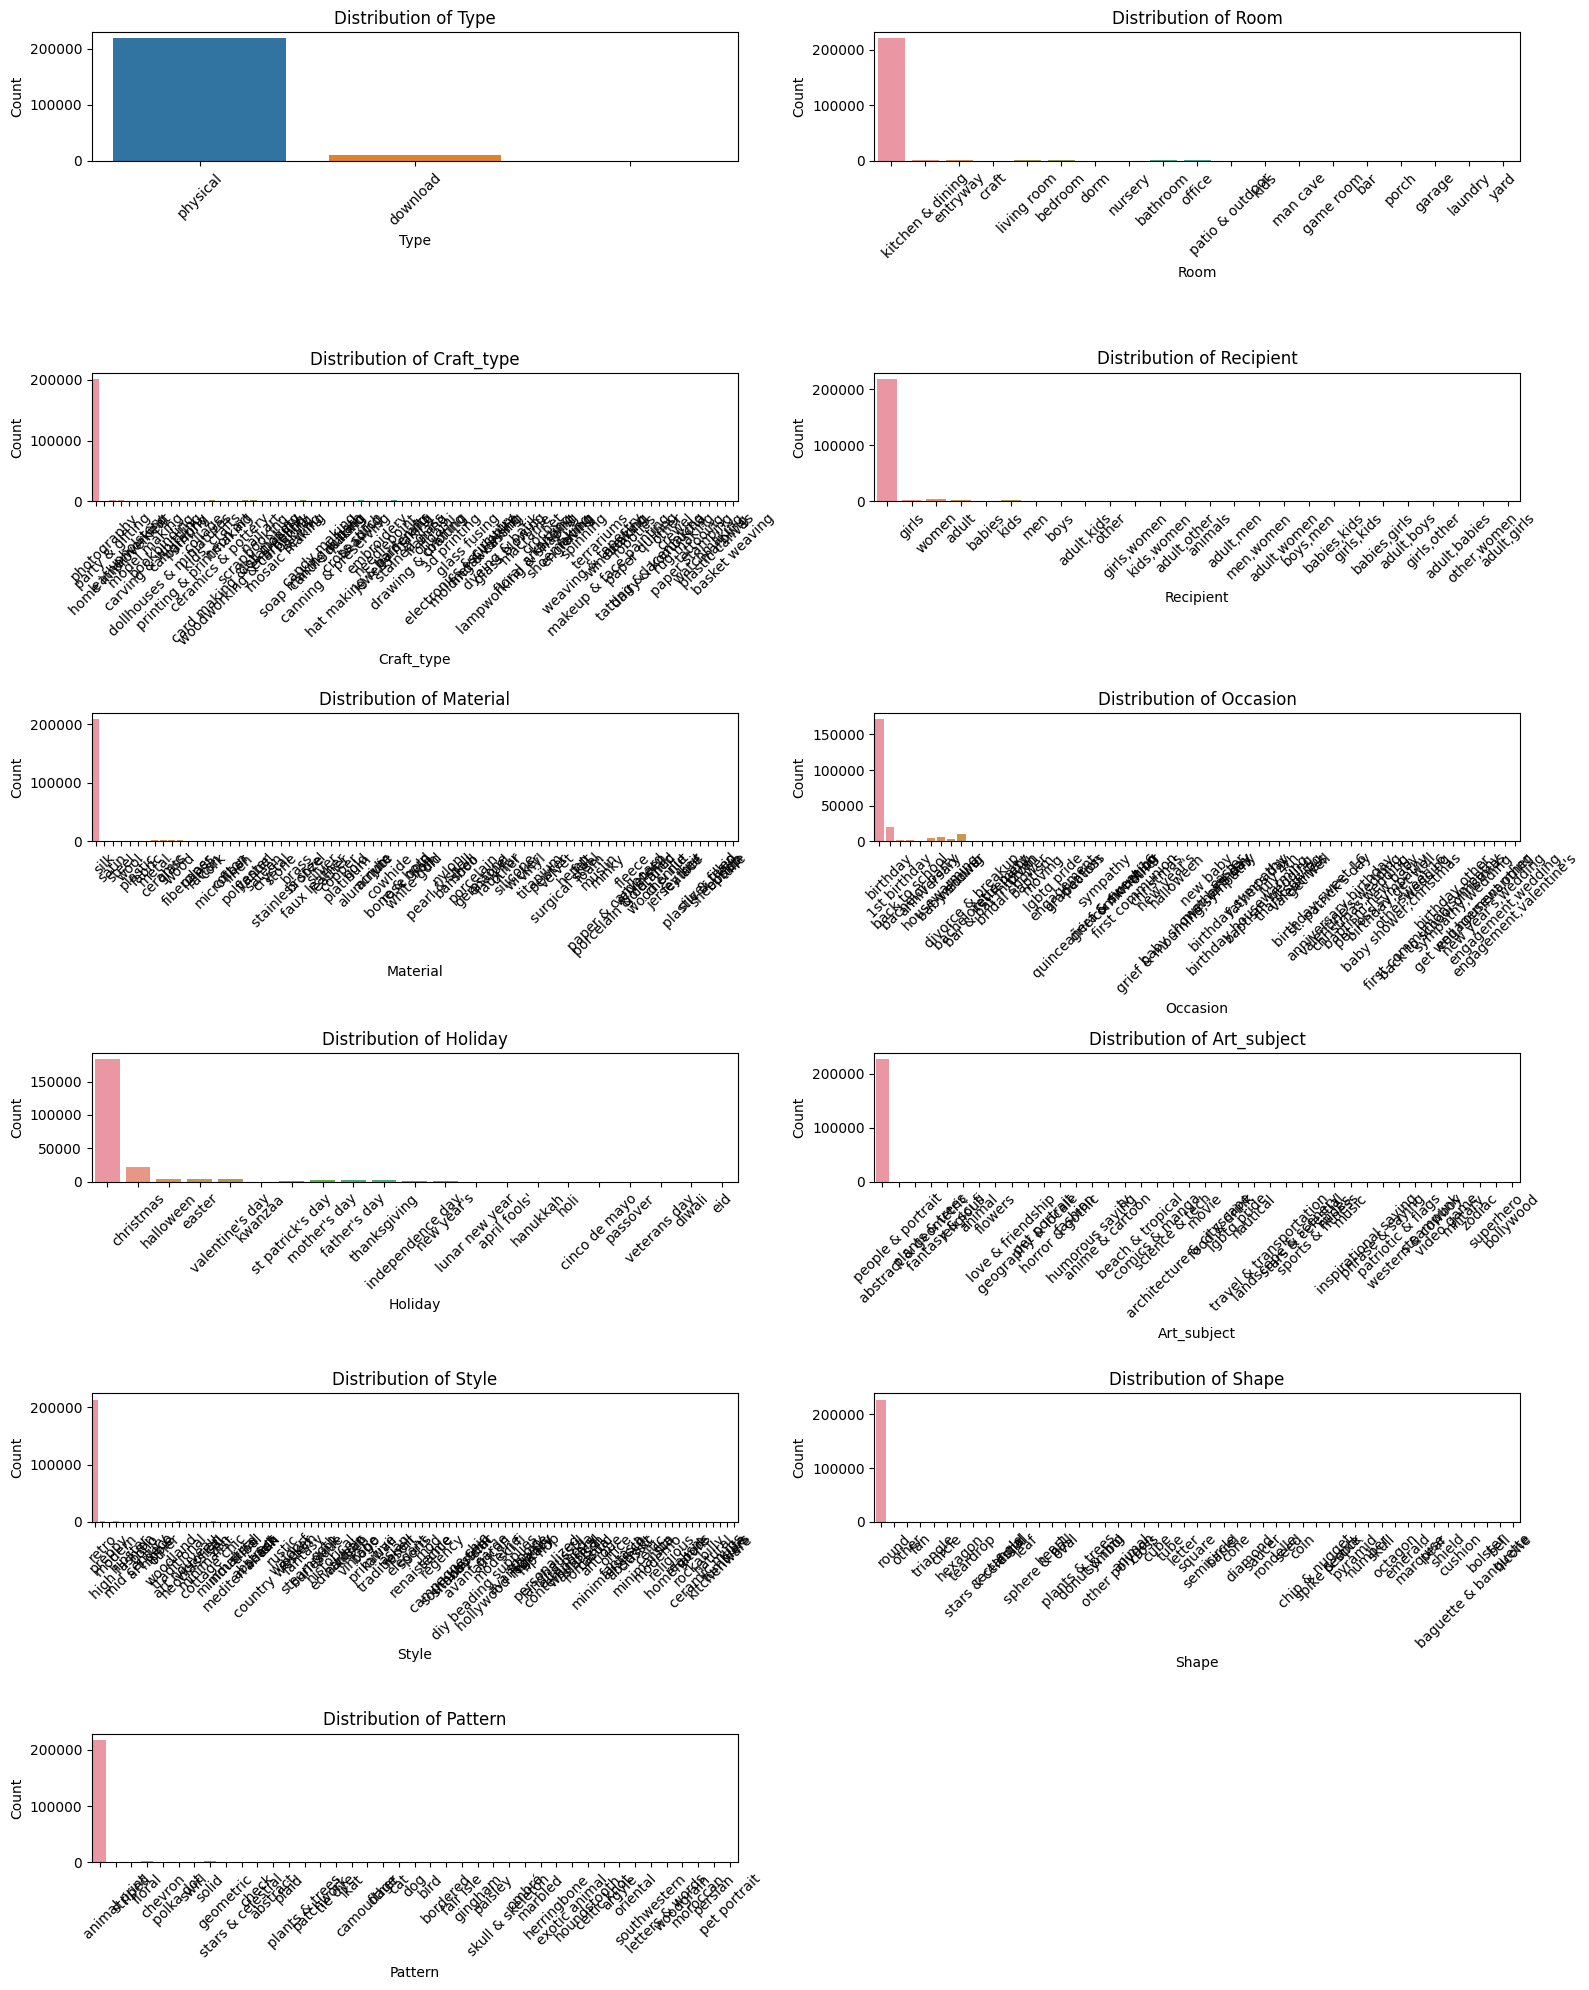

In [24]:
# Visualising the distribution of each categorical variable

categorical_cols = ['type', 'room', 'craft_type', 'recipient', 'material', 'occasion', 'holiday', 'art_subject', 'style', 'shape', 'pattern']

plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(6, 2, i)
    sns.countplot(data=train_data, x=col)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:

# Phase 3 : Working on building the model
# (includes data preprocessing steps for each specific model)


In [26]:

# Model Type I: First trying to use only text features


In [27]:
# Attempt 1 : Using a neural network (Gives the worst results) 

In [28]:
# 1. Sample the Data

In [29]:
# Creating the samples
train_sample = train_data.sample(n=10000, random_state=42)
test_sample = test_data.sample(n=1000, random_state=42)


In [30]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 167050 to 75958
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_id            10000 non-null  int64 
 1   title                 10000 non-null  object
 2   description           10000 non-null  object
 3   tags                  10000 non-null  object
 4   type                  10000 non-null  object
 5   room                  10000 non-null  object
 6   craft_type            10000 non-null  object
 7   recipient             10000 non-null  object
 8   material              10000 non-null  object
 9   occasion              10000 non-null  object
 10  holiday               10000 non-null  object
 11  art_subject           10000 non-null  object
 12  style                 10000 non-null  object
 13  shape                 10000 non-null  object
 14  pattern               10000 non-null  object
 15  bottom_category_id    10000 non-null

In [31]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 10274 to 23628
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1000 non-null   int64 
 1   title          1000 non-null   object
 2   description    1000 non-null   object
 3   tags           1000 non-null   object
 4   type           1000 non-null   object
 5   room           1000 non-null   object
 6   craft_type     1000 non-null   object
 7   recipient      1000 non-null   object
 8   material       1000 non-null   object
 9   occasion       1000 non-null   object
 10  holiday        1000 non-null   object
 11  art_subject    1000 non-null   object
 12  style          1000 non-null   object
 13  shape          1000 non-null   object
 14  pattern        1000 non-null   object
 15  image/encoded  1000 non-null   object
 16  image/width    1000 non-null   int64 
 17  image/height   1000 non-null   int64 
dtypes: int64(3), object(15)
memo

In [32]:
# 2. Preprocess Text Features

In [33]:
# nltk.download('punkt')
# nltk.download('stopwords')

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()
    
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenizing the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Performing stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Joining tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Applying it to the 3 prominent 'text' columns - title, description, and tags

train_sample['title'] = train_sample['title'].apply(preprocess_text)
train_sample['description'] = train_sample['description'].apply(preprocess_text)
train_sample['tags'] = train_sample['tags'].apply(preprocess_text)


In [34]:
train_sample

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
167050,1604849893,unsort bulk lego® collect pound lot,recent recov estat sale unsort collect took pi...,bulk legolego poundlego star warslego friendsn...,physical,,,,,birthday,...,toys_and_games.toys.building_and_construction,13,toys_and_games,13,rainbow,19,other,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,427
141396,1112454423,super mario led shadowbox diorama,super mario brother illumin shadow boxnnfram s...,mario brosmariosup mario worldmario artmario d...,physical,,,,,,...,electronics_and_accessories.video_games.handhe...,7,electronics_and_accessories,1,black,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,633
110409,212981532,inch rectangl ring antiqu gold light antiqu br...,wire rectangular loop great purs strap meant q...,purs hardwarehandbag hardwarewir ringswir loop...,physical,,leatherworking,,,,...,craft_supplies_and_tools.fabric_and_notions.no...,6,craft_supplies_and_tools,3,bronze,7,gold,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
12217,1079210206,aqua chalcedoni cabochon • code • aaa qualiti ...,product aqua chalcedoni cabochonnnw take order...,cabscabochongemston cabochongemstoneloos stone...,physical,,,,,,...,craft_supplies_and_tools.beads_gems_and_caboch...,6,craft_supplies_and_tools,2,blue,4,brown,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760
171337,709362323,men pad underwear slip,ad pad frond back boxer round alreadi exagger ...,pad underwearman pad underwearunderwearman und...,physical,,,,,wedding,...,clothing.mens_clothing.underwear.boxers_and_br...,5,clothing,1,black,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87369,976214473,eurg box fairi tender sphagnum moss color ligh...,sphagnum moss blister boxnnnveri nice delic dr...,,physical,,,,,,...,home_and_living.outdoor_and_garden.plants.moss,8,home_and_living,9,green,0,beige,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,855
82671,1613143127,bi hallmark silver spice box pure silver gift ...,bi hallmark silver stand pure silver gift item...,silver spice boxpur spice boxindian spice boxt...,physical,,,,,wedding,...,home_and_living.spirituality_and_religion.reli...,8,home_and_living,16,silver,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,442
68191,775673595,fleec snuggl sack valentin pink purpl heart,readi ship prewick sack readi small pet cuddl ...,snuggl sacksnuggl bagcuddl bagcuddl sackguinea...,physical,,,,,,...,pet_supplies.pet_bedding.liners,11,pet_supplies,11,pink,12,purple,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,366
157332,1090393467,kallala pin wild light orang ivori peach eucal...,limit time contact detailsnnpleas alway provid...,wed accessoriesflor accessorieslaviboho brideb...,physical,,,,,wedding,...,weddings.accessories.hair_accessories,14,weddings,9,green,10,orange,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,380


In [35]:
# 3. Define Features and Target

In [36]:
# Concatenating text data 
X_train_text = train_sample['title'] + ' ' + train_sample['description'] + ' ' + train_sample['tags']

# Defining the target variables
y_train_top_category = train_sample['top_category_id']
y_train_bottom_category = train_sample['bottom_category_id']
y_train_primary_color = train_sample['primary_color_id']
y_train_secondary_color = train_sample['secondary_color_id']


In [37]:
# 4. Split Data for Training and Validation

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train_text, X_val_text, y_train_top_category, y_val_top_category, y_train_bottom_category, y_val_bottom_category, y_train_primary_color, y_val_primary_color, y_train_secondary_color, y_val_secondary_color = train_test_split(
    X_train_text, y_train_top_category, y_train_bottom_category, y_train_primary_color, y_train_secondary_color, test_size=0.2, random_state=42)

# Displaying the shapes of the split data
print("Training data shapes:")
print("X_train_text:", X_train_text.shape)
print("y_train_top_category:", y_train_top_category.shape)
print("y_train_bottom_category:", y_train_bottom_category.shape)
print("y_train_primary_color:", y_train_primary_color.shape)
print("y_train_secondary_color:", y_train_secondary_color.shape)
print("\nValidation data shapes:")
print("X_val_text:", X_val_text.shape)
print("y_val_top_category:", y_val_top_category.shape)
print("y_val_bottom_category:", y_val_bottom_category.shape)
print("y_val_primary_color:", y_val_primary_color.shape)
print("y_val_secondary_color:", y_val_secondary_color.shape)


Training data shapes:
X_train_text: (8000,)
y_train_top_category: (8000,)
y_train_bottom_category: (8000,)
y_train_primary_color: (8000,)
y_train_secondary_color: (8000,)

Validation data shapes:
X_val_text: (2000,)
y_val_top_category: (2000,)
y_val_bottom_category: (2000,)
y_val_primary_color: (2000,)
y_val_secondary_color: (2000,)


In [39]:
# 5. Text Vectorization using TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

# Fitting the vectorizer on the training text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)

# Transforming the validation text data into numerical vectors using the fitted vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val_text)

# Transforming the test text data into numerical vectors using the fitted vectorizer
X_test_text = test_data['title'] + ' ' + test_data['description'] + ' ' + test_data['tags']
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Displaying the shape of the transformed data
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_val_tfidf:", X_val_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (8000, 5000)
Shape of X_val_tfidf: (2000, 5000)
Shape of X_test_tfidf: (25514, 5000)


In [41]:
# 6. Build the Model

In [42]:
num_classes_top_category = len(train_data['top_category_id'].unique())
num_classes_bottom_category = 2486 # assigning value so as to deviate errors
num_classes_primary_color = len(train_data['primary_color_id'].unique())
num_classes_secondary_color = len(train_data['secondary_color_id'].unique())

In [43]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model

# Defining input shape for text data
input_shape = X_train_tfidf.shape[1]

# Defining the input layer
text_input = Input(shape=(input_shape,), name='text_input')

# Defining the embedding layer
embedding_layer = Embedding(input_dim=5000, output_dim=100)(text_input)
lstm_layer = LSTM(100)(embedding_layer)

# Defining dense layers for each output category
dense_top_category = Dense(64, activation='relu')(lstm_layer)
dense_bottom_category = Dense(64, activation='relu')(lstm_layer)
dense_primary_color = Dense(64, activation='relu')(lstm_layer)
dense_secondary_color = Dense(64, activation='relu')(lstm_layer)

# Concatenating the dense layers
concatenated_layer = concatenate([dense_top_category, dense_bottom_category, dense_primary_color, dense_secondary_color])

# Defining output layers for each category
output_top_category = Dense(num_classes_top_category, activation='softmax', name='output_top_category')(concatenated_layer)
output_bottom_category = Dense(num_classes_bottom_category, activation='softmax', name='output_bottom_category')(concatenated_layer)
output_primary_color = Dense(num_classes_primary_color, activation='softmax', name='output_primary_color')(concatenated_layer)
output_secondary_color = Dense(num_classes_secondary_color, activation='softmax', name='output_secondary_color')(concatenated_layer)

# Defining the model
model = Model(inputs=[text_input], outputs=[output_top_category, output_bottom_category, output_primary_color, output_secondary_color])


In [44]:
# 7. Compile the Model

In [45]:
from keras.optimizers import Adam

# Defining the optimizer
optimizer = Adam(learning_rate=0.001)  

# Compiling the model
model.compile(optimizer=optimizer,
              loss={'output_top_category': 'categorical_crossentropy',
                    'output_bottom_category': 'categorical_crossentropy',
                    'output_primary_color': 'categorical_crossentropy',
                    'output_secondary_color': 'categorical_crossentropy'},
              metrics=['accuracy'])

# Displaying the model summary
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 5000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 5000, 100)    500000      ['text_input[0][0]']             
                                                                                                  
 lstm (LSTM)                    (None, 100)          80400       ['embedding[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 64)           6464        ['lstm[0][0]']                   
                                                                                              

In [46]:
# 8. Train the Model

In [47]:
# One-hot encoding target labels

from sklearn.preprocessing import OneHotEncoder

# Handling unknown values
encoder = OneHotEncoder(handle_unknown='ignore')

# Fitting and transforming the target labels for top category
y_train_top_category_one_hot = encoder.fit_transform(y_train_top_category.values.reshape(-1, 1)).toarray()
y_val_top_category_one_hot = encoder.transform(y_val_top_category.values.reshape(-1, 1)).toarray()

# Fitting and transforming the target labels for bottom category
y_train_bottom_category_one_hot = encoder.fit_transform(y_train_bottom_category.values.reshape(-1, 1)).toarray()
y_val_bottom_category_one_hot = encoder.transform(y_val_bottom_category.values.reshape(-1, 1)).toarray()

# Fitting and transforming the target labels for primary color
y_train_primary_color_one_hot = encoder.fit_transform(y_train_primary_color.values.reshape(-1, 1)).toarray()
y_val_primary_color_one_hot = encoder.transform(y_val_primary_color.values.reshape(-1, 1)).toarray()

# Fitting and transforming the target labels for secondary color
y_train_secondary_color_one_hot = encoder.fit_transform(y_train_secondary_color.values.reshape(-1, 1)).toarray()
y_val_secondary_color_one_hot = encoder.transform(y_val_secondary_color.values.reshape(-1, 1)).toarray()


In [48]:
epochs = 3 # reduced number from 10 to 3 as not much improvement happens
batch_size = 32

In [49]:
import tensorflow as tf
import scipy.sparse as sp

# Converting TF-IDF matrices to CSR format
X_train_tfidf_csr = sp.csr_matrix(X_train_tfidf)
X_val_tfidf_csr = sp.csr_matrix(X_val_tfidf)

# Finding the row and column indices of non-zero elements
train_nonzero_rows, train_nonzero_cols = X_train_tfidf_csr.nonzero()
val_nonzero_rows, val_nonzero_cols = X_val_tfidf_csr.nonzero()

# Converting indices to int64 dtype
train_indices = tf.cast(tf.stack([train_nonzero_rows, train_nonzero_cols], axis=1), tf.int64)
val_indices = tf.cast(tf.stack([val_nonzero_rows, val_nonzero_cols], axis=1), tf.int64)


In [50]:
# Converting the sparse matrices to TensorFlow sparse tensors
X_train_tfidf_sparse_tensor = tf.sparse.SparseTensor(indices=train_indices,
                                                     values=X_train_tfidf_csr.data,
                                                     dense_shape=X_train_tfidf_csr.shape)

X_val_tfidf_sparse_tensor = tf.sparse.SparseTensor(indices=val_indices,
                                                   values=X_val_tfidf_csr.data,
                                                   dense_shape=X_val_tfidf_csr.shape)

# Reordering the sparse tensors
X_train_tfidf_sparse_tensor_reordered = tf.sparse.reorder(X_train_tfidf_sparse_tensor)
X_val_tfidf_sparse_tensor_reordered = tf.sparse.reorder(X_val_tfidf_sparse_tensor)


In [51]:
# Training the model
history = model.fit({'text_input': X_train_tfidf_sparse_tensor_reordered},
                    {'output_top_category': y_train_top_category_one_hot,
                     'output_bottom_category': y_train_bottom_category_one_hot,
                     'output_primary_color': y_train_primary_color_one_hot,
                     'output_secondary_color': y_train_secondary_color_one_hot},
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=({'text_input': X_val_tfidf_sparse_tensor_reordered},
                                     {'output_top_category': y_val_top_category_one_hot,
                                      'output_bottom_category': y_val_bottom_category_one_hot,
                                      'output_primary_color': y_val_primary_color_one_hot,
                                      'output_secondary_color': y_val_secondary_color_one_hot}))


Epoch 1/3
250/250 [==============================] - 1094s 4s/step - loss: 15.7808 - output_top_category_loss: 2.4445 - output_bottom_category_loss: 7.9295 - output_primary_color_loss: 2.6938 - output_secondary_color_loss: 2.7130 - output_top_category_accuracy: 0.2418 - output_bottom_category_accuracy: 2.5000e-04 - output_primary_color_accuracy: 0.1301 - output_secondary_color_accuracy: 0.1465 - val_loss: 15.3059 - val_output_top_category_loss: 2.4583 - val_output_bottom_category_loss: 7.4676 - val_output_primary_color_loss: 2.6956 - val_output_secondary_color_loss: 2.6845 - val_output_top_category_accuracy: 0.2165 - val_output_bottom_category_accuracy: 0.0010 - val_output_primary_color_accuracy: 0.1375 - val_output_secondary_color_accuracy: 0.1665
Epoch 2/3
250/250 [==============================] - 1080s 4s/step - loss: 15.5475 - output_top_category_loss: 2.4258 - output_bottom_category_loss: 7.7682 - output_primary_color_loss: 2.6624 - output_secondary_color_loss: 2.6911 - output_to

In [52]:
# Displaying the shapes of the encoded labels

print("Shapes of input tensors:")
print("X_train_tfidf_sparse_tensor_reordered:", X_train_tfidf_sparse_tensor_reordered.shape)
print("y_train_top_category_one_hot:", y_train_top_category_one_hot.shape)
print("y_train_bottom_category_one_hot:", y_train_bottom_category_one_hot.shape)
print("y_train_primary_color_one_hot:", y_train_primary_color_one_hot.shape)
print("y_train_secondary_color_one_hot:", y_train_secondary_color_one_hot.shape)


Shapes of input tensors:
X_train_tfidf_sparse_tensor_reordered: (8000, 5000)
y_train_top_category_one_hot: (8000, 15)
y_train_bottom_category_one_hot: (8000, 2486)
y_train_primary_color_one_hot: (8000, 19)
y_train_secondary_color_one_hot: (8000, 19)


In [53]:
# Evaluating the model on validation data
evaluation_results = model.evaluate({'text_input': X_val_tfidf_sparse_tensor_reordered},
                                    {'output_top_category': y_val_top_category_one_hot,
                                     'output_bottom_category': y_val_bottom_category_one_hot,
                                     'output_primary_color': y_val_primary_color_one_hot,
                                     'output_secondary_color': y_val_secondary_color_one_hot},
                                    verbose=0,
                                    return_dict=True) 

# Printing the evaluation results
print("Evaluation Results:", evaluation_results)


Evaluation Results: {'loss': 15.3154935836792, 'output_top_category_loss': 2.455245018005371, 'output_bottom_category_loss': 7.496067523956299, 'output_primary_color_loss': 2.6908655166625977, 'output_secondary_color_loss': 2.673311710357666, 'output_top_category_accuracy': 0.21649999916553497, 'output_bottom_category_accuracy': 0.0005000000237487257, 'output_primary_color_accuracy': 0.13750000298023224, 'output_secondary_color_accuracy': 0.1665000021457672}


In [54]:
# Displaying loss and accuracy of the model

val_loss = evaluation_results['loss']
val_accuracy_top_category = evaluation_results['output_top_category_accuracy']
val_accuracy_bottom_category = evaluation_results['output_bottom_category_accuracy']
val_accuracy_primary_color = evaluation_results['output_primary_color_accuracy']
val_accuracy_secondary_color = evaluation_results['output_secondary_color_accuracy']

print("Validation Loss:", val_loss)
print("Validation Accuracy (Top Category):", val_accuracy_top_category)
print("Validation Accuracy (Bottom Category):", val_accuracy_bottom_category)
print("Validation Accuracy (Primary Color):", val_accuracy_primary_color)
print("Validation Accuracy (Secondary Color):", val_accuracy_secondary_color)


Validation Loss: 15.3154935836792
Validation Accuracy (Top Category): 0.21649999916553497
Validation Accuracy (Bottom Category): 0.0005000000237487257
Validation Accuracy (Primary Color): 0.13750000298023224
Validation Accuracy (Secondary Color): 0.1665000021457672


In [55]:
# 9. Evaluate the Model

In [56]:
# Computing f1 score
import numpy as np
from sklearn.metrics import f1_score

# Converting TF-IDF matrices to CSR format
X_val_tfidf_csr = sp.csr_matrix(X_val_tfidf)

# Ensuring indices are within bounds
max_row_index = X_val_tfidf_csr.shape[0] - 1
max_col_index = X_val_tfidf_csr.shape[1] - 1
row_indices = np.clip(X_val_tfidf_csr.indices // X_val_tfidf_csr.shape[1], 0, max_row_index)
col_indices = np.clip(X_val_tfidf_csr.indices % X_val_tfidf_csr.shape[1], 0, max_col_index)

# Ensuring unique indices
unique_indices, unique_idx = np.unique(np.column_stack([row_indices, col_indices]), axis=0, return_index=True)
unique_data = X_val_tfidf_csr.data[unique_idx]

# Converting the CSR matrix to a correctly ordered sparse tensor
val_indices = tf.sparse.reorder(tf.sparse.SparseTensor(
    unique_indices,
    unique_data,
    X_val_tfidf_csr.shape))

# Predicting probabilities for validation data
y_pred_val = model.predict({'text_input': val_indices})

# Converting probabilities to class labels
y_pred_val_top_category = np.argmax(y_pred_val[0], axis=1)
y_pred_val_bottom_category = np.argmax(y_pred_val[1], axis=1)
y_pred_val_primary_color = np.argmax(y_pred_val[2], axis=1)
y_pred_val_secondary_color = np.argmax(y_pred_val[3], axis=1)

# Calculating F1 score for each category
f1_top_category = f1_score(y_val_top_category, y_pred_val_top_category, average='macro')
f1_bottom_category = f1_score(y_val_bottom_category, y_pred_val_bottom_category, average='macro')
f1_primary_color = f1_score(y_val_primary_color, y_pred_val_primary_color, average='macro')
f1_secondary_color = f1_score(y_val_secondary_color, y_pred_val_secondary_color, average='macro')

# Printing F1 scores
print("F1 Score - Top Category:", f1_top_category)
print("F1 Score - Bottom Category:", f1_bottom_category)
print("F1 Score - Primary Color:", f1_primary_color)
print("F1 Score - Secondary Color:", f1_secondary_color)


63/63 [==============================] - 87s 1s/step
F1 Score - Top Category: 0.023729277983285384
F1 Score - Bottom Category: 1.4302090178969205e-06
F1 Score - Primary Color: 0.012724117987275883
F1 Score - Secondary Color: 0.005770570092528107


In [57]:
# 10. Predictions on Test Data

In [58]:
# Repeating the same steps for the test data

X_test_tfidf_csr = sp.csr_matrix(X_test_tfidf)
X_test_tfidf_csr.sort_indices()
row_indices, col_indices = X_test_tfidf_csr.nonzero()
indices = np.column_stack([row_indices, col_indices])

X_test_tfidf_sparse_tensor = tf.sparse.SparseTensor(
    indices=indices,
    values=X_test_tfidf_csr.data,
    dense_shape=X_test_tfidf_csr.shape
)

X_test_tfidf_reordered = tf.sparse.reorder(X_test_tfidf_sparse_tensor)


# Predicting probabilities for test data
y_pred_test = model.predict({'text_input': X_test_tfidf_reordered})

# Converting probabilities to class labels
y_pred_test_top_category = np.argmax(y_pred_test[0], axis=1)
y_pred_test_bottom_category = np.argmax(y_pred_test[1], axis=1)
y_pred_test_primary_color = np.argmax(y_pred_test[2], axis=1)
y_pred_test_secondary_color = np.argmax(y_pred_test[3], axis=1)


798/798 [==============================] - 896s 1s/step


In [59]:
print(y_pred_test_top_category)
print(y_pred_test_bottom_category)
print(y_pred_test_primary_color)
print(y_pred_test_secondary_color)


[8 8 8 ... 8 8 8]
[2187 2187 2187 ... 2187 2187 2187]
[1 1 1 ... 1 1 1]
[16 16 16 ... 16 16 16]


In [60]:
# Displaying results in the form of a dataframe

predictions_df = pd.DataFrame({
    'Top Category Prediction': y_pred_test_top_category,
    'Bottom Category Prediction': y_pred_test_bottom_category,
    'Primary Color Prediction': y_pred_test_primary_color,
    'Secondary Color Prediction': y_pred_test_secondary_color
})

print(predictions_df)


       Top Category Prediction  Bottom Category Prediction   
0                            8                        2187  \
1                            8                        2187   
2                            8                        2187   
3                            8                        2187   
4                            8                        2187   
...                        ...                         ...   
25509                        8                        2187   
25510                        8                        2187   
25511                        8                        2187   
25512                        8                        2187   
25513                        8                        2187   

       Primary Color Prediction  Secondary Color Prediction  
0                             1                          16  
1                             1                          16  
2                             1                          16  
3      

In [61]:
predictions_df # the model generates the same prediction for all the elements in the dataset

,Top Category Prediction,Bottom Category Prediction,Primary Color Prediction,Secondary Color Prediction
0,8,2187,1,16
1,8,2187,1,16
2,8,2187,1,16
3,8,2187,1,16
4,8,2187,1,16
...,...,...,...,...
25509,8,2187,1,16
25510,8,2187,1,16
25511,8,2187,1,16
25512,8,2187,1,16


In [62]:
# Attempt 2: Trying another only text model - using Random Forest  (Best perfroming in getting all categories)

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [64]:
train_sample.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,bottom_category_text,top_category_id,top_category_text,primary_color_id,primary_color_text,secondary_color_id,secondary_color_text,image/encoded,image/width,image/height
167050,1604849893,unsort bulk lego® collect pound lot,recent recov estat sale unsort collect took pi...,bulk legolego poundlego star warslego friendsn...,physical,,,,,birthday,...,toys_and_games.toys.building_and_construction,13,toys_and_games,13,rainbow,19,other,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,427
141396,1112454423,super mario led shadowbox diorama,super mario brother illumin shadow boxnnfram s...,mario brosmariosup mario worldmario artmario d...,physical,,,,,,...,electronics_and_accessories.video_games.handhe...,7,electronics_and_accessories,1,black,1,black,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,633
110409,212981532,inch rectangl ring antiqu gold light antiqu br...,wire rectangular loop great purs strap meant q...,purs hardwarehandbag hardwarewir ringswir loop...,physical,,leatherworking,,,,...,craft_supplies_and_tools.fabric_and_notions.no...,6,craft_supplies_and_tools,3,bronze,7,gold,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570
12217,1079210206,aqua chalcedoni cabochon • code • aaa qualiti ...,product aqua chalcedoni cabochonnnw take order...,cabscabochongemston cabochongemstoneloos stone...,physical,,,,,,...,craft_supplies_and_tools.beads_gems_and_caboch...,6,craft_supplies_and_tools,2,blue,4,brown,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,760
171337,709362323,men pad underwear slip,ad pad frond back boxer round alreadi exagger ...,pad underwearman pad underwearunderwearman und...,physical,,,,,wedding,...,clothing.mens_clothing.underwear.boxers_and_br...,5,clothing,1,black,17,white,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570


In [67]:
# Preprocessing the text data - using the same preprocess function defined in the other model

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# nltk.download('punkt')
# nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Applying it to all 3 text columns at once
train_sample['text_features'] = train_sample['title'] + ' ' + train_sample['description'] + ' ' + train_sample['tags']
train_sample['text_features'] = train_sample['text_features'].apply(preprocess_text)


In [68]:
# Splitting the data into features (X) and labels (y)

X = train_sample['text_features']
y = train_sample[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']]


In [69]:
# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Vectorizing the text features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [71]:
# Training a Random Forest classifier for each label
random_forest = RandomForestClassifier(n_estimators=20, random_state=42) # reducing n_estimators from 100 to 20 due to memory issues
multi_output_forest = MultiOutputClassifier(random_forest, n_jobs=-1)  # using n_jobs=-1 to utilize all CPU cores

# Fitting the model on the training data and collecting history
history = multi_output_forest.fit(X_train_tfidf, y_train)

# Making predictions on the validation data
y_pred = multi_output_forest.predict(X_val_tfidf)


In [82]:
# Creating a classification report to view results

import numpy as np
from sklearn.metrics import classification_report

if isinstance(y_val, pd.DataFrame):
    y_val = y_val.values
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.values

reports = []
for i in range(4): # because there are 4 output labels
    report = classification_report(y_val[:, i], y_pred[:, i], labels=np.unique(y_pred[:, i]), zero_division='warn')
    reports.append(report)

aggregate_report = '\n'.join(reports)
print("Aggregate Classification Report:")
print(aggregate_report)


Aggregate Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.34      0.45       110
           1       0.57      0.16      0.24        77
           2       0.54      0.33      0.41        42
           3       0.75      0.51      0.60        97
           4       0.75      0.48      0.59        62
           5       0.68      0.89      0.77       275
           6       0.52      0.60      0.56       292
           7       0.87      0.34      0.49        59
           8       0.52      0.85      0.65       433
           9       0.82      0.45      0.58        80
          10       0.66      0.56      0.61       103
          11       0.81      0.63      0.71        54
          12       0.84      0.88      0.86        81
          13       0.71      0.27      0.39       144
          14       0.58      0.33      0.42        91

    accuracy                           0.61      2000
   macro avg       0.69      0.51      0.56    

C:\Users\jasly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jasly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jasly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [83]:
# Calculating f1 score for each label
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Compute F1 score
f1_scores = []
for i in range(4):
    f1 = f1_score(y_val[:, i], y_pred[:, i], average='macro')  
    f1_scores.append(f1)


In [84]:
# Printing F1 scores
print("F1 Score - Top Category:", f1_scores[0])
print("F1 Score - Bottom Category:", f1_scores[1])
print("F1 Score - Primary Color:", f1_scores[2])
print("F1 Score - Secondary Color:", f1_scores[3])

F1 Score - Top Category: 0.5550334080801452
F1 Score - Bottom Category: 0.14392078969543756
F1 Score - Primary Color: 0.29492938484834164
F1 Score - Secondary Color: 0.15712154316173085


Average F1 Score: 0.2877512814464138


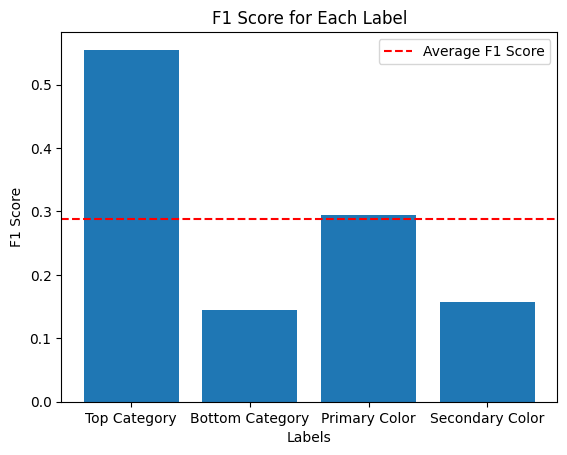

In [85]:
# Visualising f1 scores obtained by each label

average_f1_score = np.mean(f1_scores)  # calculating average F1 score across all labels
print("Average F1 Score:", average_f1_score)

labels = ['Top Category', 'Bottom Category', 'Primary Color', 'Secondary Color']
plt.bar(labels, f1_scores)
plt.axhline(y=average_f1_score, color='r', linestyle='--', label='Average F1 Score')
plt.title('F1 Score for Each Label')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


In [76]:
# Viewing predicted values and actual values side by side on the sample

train_sample['text_features'] = train_sample['title'] + ' ' + train_sample['description'] + ' ' + train_sample['tags']
train_sample['text_features'] = train_sample['text_features'].apply(preprocess_text)

X_train_sample_tfidf = tfidf_vectorizer.transform(train_sample['text_features'])

# Using the trained model to make predictions on the entire training data
train_predictions = []
for estimator in multi_output_forest.estimators_:
    train_predictions.append(estimator.predict(X_train_sample_tfidf))
train_predictions = np.array(train_predictions).T

# Converting the predictions to a dataframe
train_predictions_df = pd.DataFrame(train_predictions, columns=['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id'])

# Comparing the predicted values with the actual values
actual_values = train_sample[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']]
comparison = pd.concat([actual_values.reset_index(drop=True), train_predictions_df], axis=1)
comparison.columns = ['actual_top_category', 'actual_bottom_category', 'actual_primary_color', 'actual_secondary_color',
                        'predicted_top_category', 'predicted_bottom_category', 'predicted_primary_color', 'predicted_secondary_color']

# Rearranging the columns for better readability
new_order = ['actual_top_category', 'predicted_top_category',
             'actual_bottom_category', 'predicted_bottom_category',
             'actual_primary_color', 'predicted_primary_color',
             'actual_secondary_color', 'predicted_secondary_color']

comparison = comparison[new_order]


In [77]:
comparison.head()

,actual_top_category,predicted_top_category,actual_bottom_category,predicted_bottom_category,actual_primary_color,predicted_primary_color,actual_secondary_color,predicted_secondary_color
0,13,8,1583,2790,13,17,19,1
1,7,7,12193,12193,1,1,1,1
2,6,6,7041,7041,3,3,7,7
3,6,6,6240,6240,2,17,4,16
4,5,5,1827,1827,1,1,17,17


In [78]:
# Running the model on the test dataset

# Preprocessing the text data in the test set 
test_sample['text_features'] = test_sample['title'] + ' ' + test_sample['description'] + ' ' + test_sample['tags']
test_sample['text_features'] = test_sample['text_features'].apply(preprocess_text)

# Vectorizing the text features in the test set 
X_test_tfidf = tfidf_vectorizer.transform(test_sample['text_features'])

# Making predictions on the test data
test_predictions = multi_output_forest.predict(X_test_tfidf)


In [79]:
# Converting the predictions to a DataFrame 
test_predictions_df = pd.DataFrame(test_predictions, columns=['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id'])
predicted_test_data = pd.concat([test_sample, test_predictions_df], axis=1)

In [80]:
test_predictions_df.head()

,top_category_id,bottom_category_id,primary_color_id,secondary_color_id
0,6,1866,17,17
1,8,2919,17,11
2,7,12422,1,2
3,10,1673,1,1
4,9,1219,3,3


In [86]:
# At this point decided to use Random Forest as the final model, but experimenting with few more to see if better results can be obatined without any computational issues

In [87]:

# Model Type II: Using only images (predicting only one category due to computational restrictions)


In [88]:
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import f1_score  
import io

In [89]:
# Sampling an even smaller size of the original data 
train_data_sample = train_data.sample(100, random_state=42)
test_data_sample = test_data.sample(10, random_state=42)


In [90]:
# Defining image dimensions
img_height = 224
img_width = 224


In [91]:
# Preprocessing images

def preprocess_image(encoded_image):
    image_array = np.frombuffer(encoded_image, np.uint8)
    image = load_img(io.BytesIO(image_array))  
    resized_image = image.resize((img_height, img_width))
    image_array = img_to_array(resized_image)
    image_array = image_array / 255.0  # normalizing pixel values 
    return image_array


In [92]:
# Preparing image features for both test and train data

train_images = []
for encoded_image in train_data_sample['image/encoded']:
    train_images.append(preprocess_image(encoded_image))
train_images = np.array(train_images)

test_images = []
for encoded_image in test_data_sample['image/encoded']:
    test_images.append(preprocess_image(encoded_image))
test_images = np.array(test_images)

In [93]:
# Getting the number of unique classes for the top category attribute
num_top_categories = train_data['top_category_id'].nunique()

print("Number of Top Categories:", num_top_categories)

Number of Top Categories: 15


In [94]:
# Defining the model

image_input = Input(shape=(img_height, img_width, 3))

encoded_image = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(image_input)
encoded_image = MaxPooling2D(pool_size=(2, 2))(encoded_image)
encoded_image = Flatten()(encoded_image)

output_top_category = Dense(num_top_categories, activation='softmax')(encoded_image)

model = Model(inputs=image_input, outputs=[output_top_category])

# Compiling the model
model.compile(optimizer=Adam(),
              loss=[CategoricalCrossentropy()],
              metrics=['accuracy'])


In [95]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding the label
train_top_cat_labels = to_categorical(train_data_sample['top_category_id'], num_top_categories)
train_top_cat_labels_array = np.array(train_top_cat_labels)

model.fit(train_images, train_top_cat_labels_array, epochs=10)


Epoch 1/10
4/4 [==============================] - 3s 306ms/step - loss: 35.0872 - accuracy: 0.1100
Epoch 2/10
4/4 [==============================] - 1s 255ms/step - loss: 36.3448 - accuracy: 0.0900
Epoch 3/10
4/4 [==============================] - 1s 250ms/step - loss: 23.9782 - accuracy: 0.1100
Epoch 4/10
4/4 [==============================] - 1s 347ms/step - loss: 9.2441 - accuracy: 0.3200
Epoch 5/10
4/4 [==============================] - 1s 255ms/step - loss: 4.8060 - accuracy: 0.3900
Epoch 6/10
4/4 [==============================] - 1s 227ms/step - loss: 2.4868 - accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 1s 229ms/step - loss: 1.1898 - accuracy: 0.7400
Epoch 8/10
4/4 [==============================] - 1s 223ms/step - loss: 0.7483 - accuracy: 0.8200
Epoch 9/10
4/4 [==============================] - 1s 227ms/step - loss: 0.5354 - accuracy: 0.8500
Epoch 10/10
4/4 [==============================] - 1s 248ms/step - loss: 0.3933 - accuracy: 0.9500


In [96]:
# Making predictions on test data
predictions = model.predict(test_images)


1/1 [==============================] - 0s 74ms/step


In [97]:
predicted_top_categories = np.argmax(predictions, axis=1)
predicted_top_categories

array([10,  5,  7,  5,  6,  6,  6,  6,  6,  6], dtype=int64)

In [103]:
# Creating a dataframe for the predictions

import pandas as pd
predicted_top_categories = np.argmax(predictions, axis=1)
predictions_df = pd.DataFrame({
    'product_id': test_data_sample['product_id'],  
    'predicted_top_category': predicted_top_categories
})


In [104]:
predictions_df

,product_id,predicted_top_category
10274,726273220,10
7330,546069580,5
11487,1639862700,7
25066,1089529420,5
24841,1126213770,6
2213,758254670,6
14759,887852240,6
14977,1526472730,6
15725,1583167640,6
13504,629774400,6


In [105]:
# To upload on the report

head_predicted_df = predictions_df.head()
head_predicted_df.to_csv('Model_3.csv', index=False) 


In [106]:

# Model Type III: Using both image features and text to build the model (able to predict 3 with current computational power)


In [107]:
# Sampling the train and test data - going to exclude bottom category
train_data_sample = train_data.sample(500, random_state=
                                      42)
test_data_sample = test_data.sample(50, random_state=42)

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical

In [109]:
# Define input shapes and other parameters

str_maxlen = 1000  # maximum length of string
vocab_size = 10000  # vocabulary size for tokenization
image_input_shape = (224, 224, 3)  # image input shape where 224 is width and height and 3 represents RGB


In [110]:
# Checking the number of unique classes for each category

num_classes_top_category = len(train_data_sample['top_category_id'].unique())
num_classes_primary_color = len(train_data_sample['primary_color_id'].unique())
num_classes_secondary_color = len(train_data_sample['secondary_color_id'].unique())
print(num_classes_top_category)
print(num_classes_primary_color)
print(num_classes_secondary_color)

15
19
19


In [111]:
# Text preprocessing - using description as the main text feature

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data_sample['description'])

# Converting text to sequences and pad them
train_text_sequences = tokenizer.texts_to_sequences(train_data_sample['description'])
train_text_padded = pad_sequences(train_text_sequences, maxlen=str_maxlen)


In [112]:
import cv2

def decode_image(encoded_image):
    # Converting byte-encoded image to numpy array
    nparr = np.frombuffer(encoded_image, np.uint8)
    # Decoding image
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return image

# Decoding image data
train_data_sample['image_data'] = train_data_sample['image/encoded'].apply(decode_image)


In [113]:
# Resizing images to match ResNet50 input shape
def resize_image(image, target_shape=(224, 224)):
    return cv2.resize(image, target_shape)

# Preprocessing image data
train_image_data = np.array([resize_image(img) for img in train_data_sample['image_data']])


In [114]:
# Spliting train data into features and target

X_train_text = train_text_padded
X_train_image = train_image_data
Y_train_top_category = to_categorical(train_data_sample['top_category_id'])
Y_train_primary_color = to_categorical(train_data_sample['primary_color_id'])
Y_train_secondary_color = to_categorical(train_data_sample['secondary_color_id'])


In [115]:
Y_train_top_category

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [116]:
# Defining text input
text_input = Input(shape=(str_maxlen,))
text_embedding = Embedding(vocab_size, 100)(text_input)
text_flatten = Flatten()(text_embedding)


In [117]:
# Defining image input
image_input = Input(shape=image_input_shape)
image_resnet = ResNet50(weights='imagenet', include_top=False)(image_input)
image_flatten = Flatten()(image_resnet)


In [118]:
# Concatenating text and image features
concatenated = Concatenate()([text_flatten, image_flatten])


In [119]:
# Defining output layers with correct number of classes 
output_top_category = Dense(15, activation='softmax', name='output_top_category')(concatenated)
output_primary_color = Dense(20, activation='softmax', name='output_primary_color')(concatenated) # assiging 20 to match the shape required by the model
output_secondary_color = Dense(20, activation='softmax', name='output_secondary_color')(concatenated) # same reasoning as above


In [120]:
# Compiling the model
model = Model(inputs=[text_input, image_input], outputs=[output_top_category, output_primary_color, output_secondary_color])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [121]:
# Training the model
model.fit([X_train_text, X_train_image], [Y_train_top_category, Y_train_primary_color, Y_train_secondary_color], epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
13/13 [==============================] - 123s 8s/step - loss: 36.3243 - output_top_category_loss: 11.2800 - output_primary_color_loss: 13.7545 - output_secondary_color_loss: 11.2898 - output_top_category_accuracy: 0.1450 - output_primary_color_accuracy: 0.0875 - output_secondary_color_accuracy: 0.0850 - val_loss: 606532.0000 - val_output_top_category_loss: 311357.6250 - val_output_primary_color_loss: 164152.0938 - val_output_secondary_color_loss: 131022.2969 - val_output_top_category_accuracy: 0.0000e+00 - val_output_primary_color_accuracy: 0.0000e+00 - val_output_secondary_color_accuracy: 0.1000
Epoch 2/5
13/13 [==============================] - 103s 8s/step - loss: 9.0779 - output_top_category_loss: 2.9320 - output_primary_color_loss: 3.0560 - output_secondary_color_loss: 3.0900 - output_top_category_accuracy: 0.3425 - output_primary_color_accuracy: 0.3075 - output_secondary_color_accuracy: 0.2975 - val_loss: 735.2587 - val_output_top_category_loss: 196.7914 - val_output_pr

In [122]:
# Split the training data into training and validation sets
X_train_text, X_val_text, X_train_image, X_val_image, Y_train_top_category, Y_val_top_category, Y_train_primary_color, Y_val_primary_color, Y_train_secondary_color, Y_val_secondary_color = train_test_split(
    train_text_padded, train_image_data, 
    to_categorical(train_data_sample['top_category_id']), 
    to_categorical(train_data_sample['primary_color_id']), 
    to_categorical(train_data_sample['secondary_color_id']), 
    test_size=0.2, random_state=42)

# Evaluating the model on validation data
val_loss, val_top_category_loss, val_primary_color_loss, val_secondary_color_loss, val_top_category_accuracy, val_primary_color_accuracy, val_secondary_color_accuracy = model.evaluate([X_val_text, X_val_image], [Y_val_top_category, Y_val_primary_color, Y_val_secondary_color])
print("Validation Loss:", val_loss)
print("Validation Top Category Loss:", val_top_category_loss)
print("Validation Primary Color Loss:", val_primary_color_loss)
print("Validation Secondary Color Loss:", val_secondary_color_loss)
print("Validation Top Category Accuracy:", val_top_category_accuracy)
print("Validation Primary Color Accuracy:", val_primary_color_accuracy)
print("Validation Secondary Color Accuracy:", val_secondary_color_accuracy)


4/4 [==============================] - 5s 1s/step - loss: 3581.7554 - output_top_category_loss: 784.1983 - output_primary_color_loss: 1359.6978 - output_secondary_color_loss: 1437.8594 - output_top_category_accuracy: 0.0600 - output_primary_color_accuracy: 0.0100 - output_secondary_color_accuracy: 0.0200
Validation Loss: 3581.75537109375
Validation Top Category Loss: 784.1983032226562
Validation Primary Color Loss: 1359.69775390625
Validation Secondary Color Loss: 1437.859375
Validation Top Category Accuracy: 0.05999999865889549
Validation Primary Color Accuracy: 0.009999999776482582
Validation Secondary Color Accuracy: 0.019999999552965164


In [123]:
# Tokenizing and padding test text data
test_text_sequences = tokenizer.texts_to_sequences(test_data_sample['title'])
X_test_text = pad_sequences(test_text_sequences, maxlen=str_maxlen)


In [124]:
# Decoding and preprocessing test image data
test_data_sample['image_data'] = test_data_sample['image/encoded'].apply(decode_image)
X_test_image = np.array([resize_image(img) for img in test_data_sample['image_data']])


In [125]:
# Making predictions on test data
predictions = model.predict([X_test_text, X_test_image])


2/2 [==============================] - 4s 956ms/step


In [126]:
import pandas as pd

predictions_top_category = predictions[0]
predictions_primary_color = predictions[1]
predictions_secondary_color = predictions[2]

# Converting predictions to DataFrame
predictions_df = pd.DataFrame({
    'product_id': test_data_sample['product_id'],  
    'predicted_top_category': predictions_top_category.argmax(axis=1), 
    'predicted_primary_color': predictions_primary_color.argmax(axis=1),  
    'predicted_secondary_color': predictions_secondary_color.argmax(axis=1) 
})

print(predictions_df)


       product_id  predicted_top_category  predicted_primary_color   
10274   726273220                      12                       13  \
7330    546069580                      12                       13   
11487  1639862700                      12                       13   
25066  1089529420                      12                       13   
24841  1126213770                      12                       13   
2213    758254670                      12                       13   
14759   887852240                       6                       13   
14977  1526472730                      12                       13   
15725  1583167640                      12                       13   
13504   629774400                      12                       13   
8451   1435271460                      12                       13   
11941   972859930                       6                       13   
22703   939093300                      12                       13   
10189   270305080   

In [127]:
predictions_df

,product_id,predicted_top_category,predicted_primary_color,predicted_secondary_color
10274,726273220,12,13,18
7330,546069580,12,13,18
11487,1639862700,12,13,18
25066,1089529420,12,13,18
24841,1126213770,12,13,7
2213,758254670,12,13,18
14759,887852240,6,13,18
14977,1526472730,12,13,18
15725,1583167640,12,13,18
13504,629774400,12,13,7


In [128]:
# To upload on the report
head_predicted_df = predictions_df.head()

head_predicted_df.to_csv('Model_4.csv', index=False) 

In [129]:
# Since random forest was the most computationaly feasible and gave moderately accurate results, we will run that code on the entire data set to get the final output

In [130]:
# FINAL MODEL - using batch processing so as to not exhaust computing resources

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [132]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# nltk.download('punkt')
# nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Applying it to all 3 text columns at once
train_data['text_features'] = train_data['title'] + ' ' + train_data['description'] + ' ' + train_data['tags']
train_data['text_features'] = train_data['text_features'].apply(preprocess_text)


In [133]:
# Splitting the data into features (X) and labels (y)

X = train_data['text_features']
y = train_data[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']]

In [134]:
# Split the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Vectorizing the text features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [136]:
# Training a Random Forest classifier for each label
random_forest = RandomForestClassifier(n_estimators=20, random_state=42) 
multi_output_forest = MultiOutputClassifier(random_forest, n_jobs=-1)  

In [140]:
# Batch Processing for Training

# batch_sizes tried: 1000, 10000
# batch_sizes that exhausted memory : 80000, 50000,

# Running batch size of 20000
# Don't want to run any greater values in case it may lead to overfitting

batch_size = 20000  
for i in range(0, X_train_tfidf.shape[0], batch_size):
    X_batch = X_train_tfidf[i:i+batch_size]
    y_batch = y_train.iloc[i:i+batch_size]
    multi_output_forest = MultiOutputClassifier(random_forest, n_jobs=1)  
    multi_output_forest.fit(X_batch, y_batch)


In [141]:
# Transform validation text data
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Make predictions on validation set
y_pred_val = multi_output_forest.predict(X_val_tfidf)


In [142]:
len(y_pred_val)

45925

In [143]:
y_pred_val

array([[   6, 1957,    1,   16],
       [   8, 1619,    1,    1],
       [   6,  161,    7,    7],
       ...,
       [   5,  481,   17,    1],
       [   9, 1195,    1,   17],
       [   2,  190,    1,    2]], dtype=int64)

In [144]:
import pandas as pd
from sklearn.metrics import f1_score

labels = ['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']  

f1_scores_val = []
for i, label in enumerate(labels):
    f1 = f1_score(y_val[label], y_pred_val[:, i], average='macro')  
    f1_scores_val.append(f1)

# Printing F1 scores for validation set with labels
for i, label in enumerate(labels):
    print(f"F1 Score (Validation) - {label}:", f1_scores_val[i])


F1 Score (Validation) - top_category_id: 0.47004726752212217
F1 Score (Validation) - bottom_category_id: 0.09796368536955667
F1 Score (Validation) - primary_color_id: 0.26845683329924147
F1 Score (Validation) - secondary_color_id: 0.15022312343414815


Average F1 Score: 0.24667272740626708


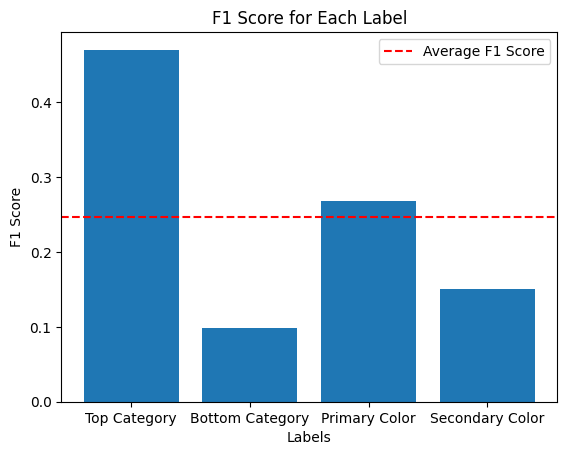

In [145]:
# Visualising f1 scores obtained by each label

from matplotlib import pyplot as plt
import numpy as np

average_f1_score = np.mean(f1_scores_val)  
print("Average F1 Score:", average_f1_score)

labels = ['Top Category', 'Bottom Category', 'Primary Color', 'Secondary Color']
plt.bar(labels, f1_scores_val)
plt.axhline(y=average_f1_score, color='r', linestyle='--', label='Average F1 Score')
plt.title('F1 Score for Each Label')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


In [146]:
# From the above codes we can oberve that it performs a little worse than when applied to a sample of the data

# However, as you increase the batch_size, the performance improves. 
# Average F1 Score: 0.12390077398044258 for batch_size = 1,000  
# Average F1 Score: 0.24667272740626708 for batch_size = 10,000 
# Average F1 Score: 0.24667272740626708 for batch_size = 20,000

# So it looks like an average score of 24.6% is the maximum we can get with this model

# Note: first 2 iterations (1,000 and 10,000) are not shown in this notebook


In [147]:
# Viewing predicted values and actual values side by side on the sample

train_sample = train_data.sample(n=100, random_state=42)

train_sample['text_features'] = train_sample['title'] + ' ' + train_sample['description'] + ' ' + train_sample['tags']
train_sample['text_features'] = train_sample['text_features'].apply(preprocess_text)

X_train_sample_tfidf = tfidf_vectorizer.transform(train_sample['text_features'])

train_predictions = []
for estimator in multi_output_forest.estimators_:
    train_predictions.append(estimator.predict(X_train_sample_tfidf))
train_predictions = np.array(train_predictions).T

train_predictions_df = pd.DataFrame(train_predictions, columns=['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id'])

actual_values = train_sample[['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id']]
comparison = pd.concat([actual_values.reset_index(drop=True), train_predictions_df], axis=1)
comparison.columns = ['actual_top_category', 'actual_bottom_category', 'actual_primary_color', 'actual_secondary_color',
                        'predicted_top_category', 'predicted_bottom_category', 'predicted_primary_color', 'predicted_secondary_color']

new_order = ['actual_top_category', 'predicted_top_category',
             'actual_bottom_category', 'predicted_bottom_category',
             'actual_primary_color', 'predicted_primary_color',
             'actual_secondary_color', 'predicted_secondary_color']

comparison = comparison[new_order]


In [148]:
comparison.head()

,actual_top_category,predicted_top_category,actual_bottom_category,predicted_bottom_category,actual_primary_color,predicted_primary_color,actual_secondary_color,predicted_secondary_color
0,13,6,1583,1957,13,1,19,16
1,7,8,12193,1619,1,1,1,1
2,6,6,7041,161,3,7,7,7
3,6,6,6240,6240,2,16,4,17
4,5,5,1827,462,1,9,17,17


In [149]:
# To upload on the report
head_predicted_df =  comparison.head()

head_predicted_df.to_csv('Model_MAIN_comparison.csv', index=False) 

In [150]:
# Running the model on the test dataset

# Preprocessing the text data in the test set 
test_data['text_features'] = test_data['title'] + ' ' + test_data['description'] + ' ' + test_data['tags']
test_data['text_features'] = test_data['text_features'].apply(preprocess_text)

# Vectorizing the text features in the test set 
X_test_tfidf = tfidf_vectorizer.transform(test_data['text_features'])

In [151]:
# Changing the batch_size from 20,000 as test_data has 25,514 records
batch_size = 10000

test_predictions = []
for i in range(0, X_test_tfidf.shape[0], batch_size):
    X_batch = X_test_tfidf[i:i+batch_size]
    predictions = multi_output_forest.predict(X_batch)
    test_predictions.extend(predictions.tolist())


In [152]:
# Converting the predictions to a DataFrame  
test_predictions_df = pd.DataFrame(test_predictions, columns=['top_category_id', 'bottom_category_id', 'primary_color_id', 'secondary_color_id'])
predicted_test_data = pd.concat([test_data, test_predictions_df], axis=1)

In [153]:
test_predictions_df

,top_category_id,bottom_category_id,primary_color_id,secondary_color_id
0,3,2809,11,1
1,6,249,14,14
2,8,6,18,18
3,8,1633,9,17
4,8,76,17,17
...,...,...,...,...
25509,10,1339,17,1
25510,10,116,17,1
25511,10,12482,1,17
25512,10,116,17,1


In [154]:
# To upload on the report
head_predicted_df = predicted_test_data.head()
head_predicted_df.to_csv('Model_MAIN.csv', index=False) 


In [156]:
predicted_test_data.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,...,shape,pattern,image/encoded,image/width,image/height,text_features,top_category_id,bottom_category_id,primary_color_id,secondary_color_id
0,661373440,"Classroom Valentine Favors, Valentine Pencils,...","Valentine Favors, Robots of Love Vinyl Pencil ...","Valentines day favor,kindergarten treats,valen...",physical,,kids' crafts,,,,...,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,739,classroom valentin favor valentin pencil valen...,3,2809,11,1
1,1501009290,5 Colour Slatepencils In One Pack Order NOw,5 Colour Slatepencils In One Pack Order NOw\n\...,"slatepencils,clay,nakumatt,edibleclay",physical,,drawing & drafting,,,,...,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,321,colour slatepencil one pack order colour slate...,6,249,14,14
2,1105447030,"No 2 Pencils by Associated Commercial, #2 Wri...","This listing is for a dozen, unused pre sharpe...","Faber Castell,aw faber,Faber-Castell,antique p...",physical,,drawing & drafting,,,,...,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,330,pencil associ commerci write pencil origin box...,8,6,18,18
3,1140081090,"Personalized Carpenter Pencils, Engraved Carpe...",EtchThisOut is now offering Carpenter Pencils ...,"Personalized Pencils,Carpenter Pencils,Carpent...",physical,,drawing & drafting,,,birthday,...,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570,person carpent pencil engrav carpent pencil ca...,8,1633,9,17
4,793448890,Vintage 1960&#39;s Autopoint mechanical pencil...,Vintage 1950&#39;s Autopoint mechanical pencil...,"Mechanical pencil,Autopoint pencil,Drafting pe...",physical,,calligraphy,,,,...,,,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,570,570,vintag autopoint mechan pencil nice condit dec...,8,76,17,17


In [157]:
# Checking how many ids were generated for each label

predicted_test_data['top_category_id'].unique()

array([ 3,  6,  8,  5,  9,  1, 12, 13, 11,  0, 10,  2, 14,  4,  7],
      dtype=int64)

In [158]:
predicted_test_data['bottom_category_id'].unique()

array([ 2809,   249,     6, ...,  1943, 12170,  1667], dtype=int64)

In [159]:
predicted_test_data['primary_color_id'].unique()

array([11, 14, 18,  9, 17,  4,  1,  2,  0, 16,  5,  7, 12,  3, 10,  6, 19,
       15, 13], dtype=int64)

In [161]:
predicted_test_data['secondary_color_id'].unique()

array([ 1, 14, 18, 17,  4,  7,  9, 11,  2, 16, 19,  0,  5,  3,  6, 12, 15,
       13, 10], dtype=int64)

In [162]:
# Generating the parquet file for submission

student_id = "23262425"
predicted_test_data[
   ["product_id", "top_category_id", "bottom_category_id", "primary_color_id", "secondary_color_id"]
].to_parquet(f"predictions_{student_id}.parquet")
